#  NAIVE BAYES (BERNOULLI) - Scikit-Learn

### BERNOULLI Naive Bayes 

Assim como o MultinomialNB, o BenoulliNB é adequado para dados discretos. A diferença é que o Bernoulli é projetado para recursos binários ou booleanos, enquanto o Multinomial trabalha com contagens de ocorrÊncias

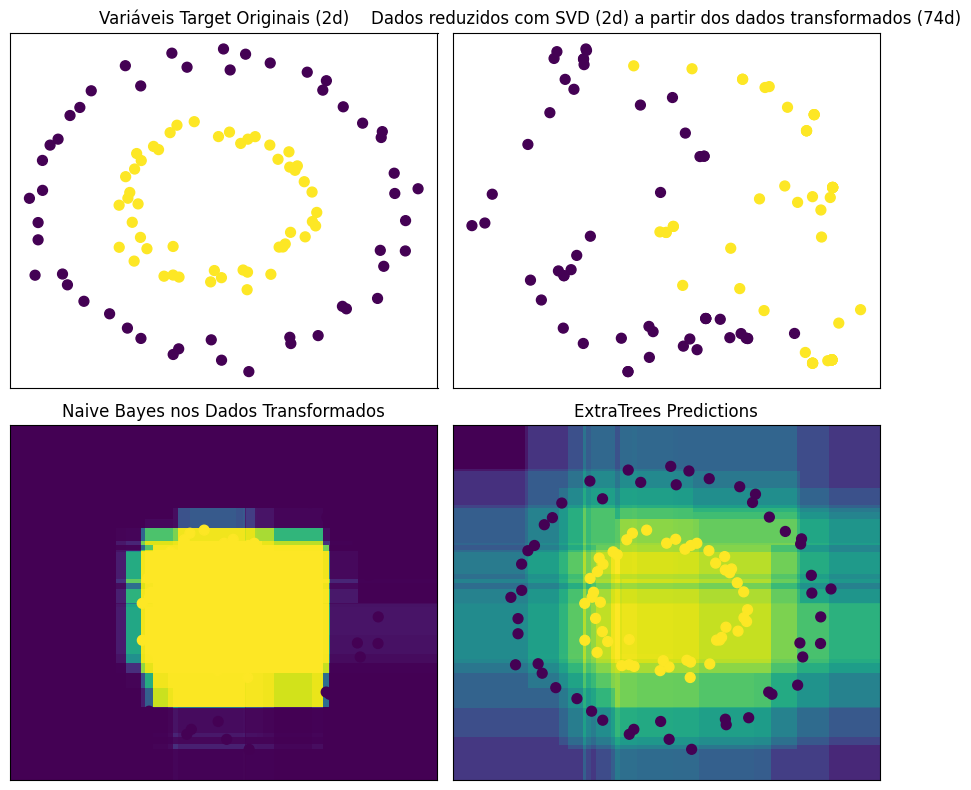

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

# Gerando uma massa de dados
X, y = make_circles(factor = 0.5, random_state = 0, noise = 0.05)

# Usando o RandomTreesEmbedding para transformar dados
hasher = RandomTreesEmbedding(n_estimators = 10, random_state = 0, max_depth = 3)
X_transformed = hasher.fit_transform(X)

# Visualizando o resultado após a redução da dimensionalidade com SVD
svd = TruncatedSVD(n_components = 2)
X_reduced = svd.fit_transform(X_transformed)

# Criando um Classificador Naive Bayes e aplicando aos dados transformados
nb = BernoulliNB()
nb.fit(X_transformed, y)

# Criando um Classificador ExtraTreesClassifier para comparação
trees = ExtraTreesClassifier(max_depth = 3, n_estimators = 10, random_state = 0)
trees.fit(X, y)

# Plot
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Variáveis Target Originais (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50)
ax.set_title("Dados reduzidos com SVD (2d) a partir dos dados transformados (%dd)" % X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# Plotando o espaço de decisão original e aplicando as cores no MeshGrid
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transforma o Grid usando RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes nos Dados Transformados")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# Transformando o Grid usando ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees Predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()